# 07. Mushroom Classifer - Handling Categorical Data

## Naive Bayes - Mushroom Dataset
- Goal is to predict the class of mushrooms, given some features of mushroom.
- We will use Naive Bayes Model  for this classification.

## A. Load the Dataset

In [1]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('../Csv Files/mushrooms.csv')
df.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
df.head(n=10)

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [7]:
print(df.shape)

(8124, 23)


## B. Encode the Categorical Data into Numerical Data

### We can either iterate over all the types and give them numerical values
### or can use SciKitLearn.preprocessing LabelEncoder

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()

# Applies transformation on each columns
ds=df.apply(le.fit_transform)

In [21]:
df.apply?

In [22]:
le.fit_transform?

In [23]:
print(type(ds))

<class 'pandas.core.frame.DataFrame'>


In [24]:
print(ds)

      type  cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0        1          5            2          4        1     6                1   
1        0          5            2          9        1     0                1   
2        0          0            2          8        1     3                1   
3        1          5            3          8        1     6                1   
4        0          5            2          3        0     5                1   
5        0          5            3          9        1     0                1   
6        0          0            2          8        1     0                1   
7        0          0            3          8        1     3                1   
8        1          5            3          8        1     6                1   
9        0          0            2          9        1     0                1   
10       0          5            3          9        1     3                1   
11       0          5       

In [32]:
# New Numerical Data
# type is the class of the mushroom => y dataset
# rest columns represents the features of the mushrooms => x dataset
ds.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [30]:
# Convert to numpy array
data=ds.values
print(type(data))
print(data.shape)
print(data[:5,:])

<class 'numpy.ndarray'>
(8124, 23)
[[1 5 2 4 1 6 1 0 1 4 0 3 2 2 7 7 0 2 1 4 2 3 5]
 [0 5 2 9 1 0 1 0 0 4 0 2 2 2 7 7 0 2 1 4 3 2 1]
 [0 0 2 8 1 3 1 0 0 5 0 2 2 2 7 7 0 2 1 4 3 2 3]
 [1 5 3 8 1 6 1 0 1 5 0 3 2 2 7 7 0 2 1 4 2 3 5]
 [0 5 2 3 0 5 1 1 0 4 1 3 2 2 7 7 0 2 1 0 3 0 1]]


## C. Break the Data into train and test

In [14]:
from sklearn.model_selection import train_test_split

In [33]:
data_y=data[:,0]
data_x=data[:,1:]

x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.2)

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6499, 22)
(6499,)
(1625, 22)
(1625,)


In [35]:
np.unique(y_train)

array([0, 1])

In [40]:
# For getting the categorical data back from numerical data use inverse transform
from sklearn.preprocessing import LabelEncoder


In [51]:
le=LabelEncoder()
le.inverse_transform?

# 08. Mushroom Classifier - Prior and Conditional Probability

## Building our classifier !

In [54]:
a=np.array([0,0,0,1,1,1,0,1])
print(a==1)
print(np.sum(a==1))

[False False False  True  True  True False  True]
4


In [55]:
a=np.array([0,0,0,1,5,1,0,1,5])
print(a==5)
print(np.sum(a==5))

[False False False False  True False False False  True]
2


In [56]:
a=np.array([0,0,0,1,5,1,0,1,5])
print(a==5)
print(np.sum(a>=1))

[False False False False  True False False False  True]
5


In [57]:
# Prior Probability
def prior_prob(y_train,label):
    total_examples=y_train.shape[0]
    class_examples=np.sum(y_train==label)
    return (class_examples)/float(total_examples)

In [58]:
y=np.array([0,5,5,1,1,1,1,0,0,0])
prior_prob(y,1)

0.4

In [59]:
y=np.array([0,5,5,1,1,1,1,0,0,0])
prior_prob(y,5)

0.2

In [61]:
# Conditional Probability
def cond_prob(x_train,y_train,feature_col,feature_val,label):
    x_filtered=x_train[y_train==label]
    numerator=np.sum(x_filtered[:,feature_col]==feature_val)
    denominator=np.sum(y_train==label)
    return numerator/float(denominator)

# 09. Mushroom Classification - Prediction using Posterior Probability

### Next Step : Compute Posterior Probability for each text example and make predictions

In [62]:
np.unique(y_train)

array([0, 1])

In [71]:
# Posterior Probability
def predict(x_train,y_train,xtest):
    """xtest is a single testing point with n features"""
    classes=np.unique(y_train)
    n_features=x_train.shape[1]
    post_probs=[]
    # List of probability of all classes and given a single testing point
    # Computing Posterior Probability for each class
    for label in classes:
        # Posterior Probability of Current Class = (Likelihood * Prior Probability)/Marginal Probability
        # P(A|B) = ( P(B|A) * P(A) ) / P(B)
        # P(A) is the prior probability or marginal probability of A.It is ”prior” in the sense that it does not take into account any information about B.
        # P(A|B) is the conditional probability of A, given B. It is also called the posterior probability because it is derived from or depends upon the specified value of B.
        # P(B|A) is the conditional probability of B given A.
        # P(B) is the prior or marginal probability of B, and acts as a normalizing constant.
        # Here we are ignoring Marginal Probability because it is constant for all and we just need to calculate the maximum of them.
        # Marginal is same for every class that is why will not affect the maximum value among posterior probabilities.
        likelihood=1.0
        for f in range (n_features):
            cond=cond_prob(x_train,y_train,f,xtest[f],label)
            likelihood*=cond
        prior=prior_prob(y_train,label)
        post=likelihood* prior
        post_probs.append(post)
    prediction=np.argmax(post_probs)
    return prediction       

In [72]:
output =predict(x_train,y_train,x_test[1])
print(output)
print(y_test[1])

1
1


In [73]:
output =predict(x_train,y_train,x_test[2])
print(output)
print(y_test[2])

0
0


In [74]:
output =predict(x_train,y_train,x_test[23])
print(output)
print(y_test[23])

1
1


In [78]:
# Score Function
def score(x_train,y_train,x_test,y_test):
    pred=[]
    for i in range(x_test.shape[0]):
        pred_label=predict(x_train,y_train,x_test[i])
        pred.append(pred_label)
    pred=np.array(pred)
    accuracy=np.sum(pred==y_test)/y_test.shape[0]
    return accuracy

In [80]:
print(score(x_train,y_train,x_test,y_test))

0.9938461538461538


# 16. Gaussian Naive Bayes - Handling Continuous Valued Features

### sklearn.naive_bayes.MultinomialNB
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

### sklearn.naive_bayes.GaussianNB
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [42]:
from sklearn.naive_bayes import GaussianNB

In [43]:
gnb=GaussianNB()
gnb

GaussianNB(priors=None, var_smoothing=1e-09)

In [44]:
from sklearn.datasets import make_classification

In [45]:
X,Y=make_classification(n_samples=200,n_features=2,n_informative=2,n_redundant=0,random_state=4)

In [46]:
import matplotlib.pyplot as plt

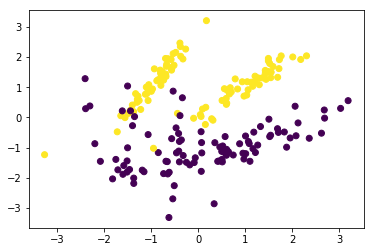

In [47]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [48]:
print(X[0])
print(X.shape) # Continuous Valued Features

[-1.36748138 -2.18619146]
(200, 2)


In [49]:
# Train Our Classifier
gnb.fit(X,Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [50]:
# Accuracy
gnb.score(X,Y)

0.9

In [53]:
y_predicted=gnb.predict(X)
y_predicted

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1])

In [54]:
Y

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1])

In [55]:
import numpy as np
accuracy=(np.sum(y_predicted==Y))/X.shape[0]
print(accuracy)

0.9


# 17. MNIST Classification - Multinomial Vs Gaussian Naive Bayes

In [56]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

### A. Dataset Preparation

In [57]:
# Load the sklearn MNIST Dataset
digits=load_digits()

In [58]:
X=digits.data
Y=digits.target

In [59]:
print(X.shape)
print(Y.shape)

(1797, 64)
(1797,)


0


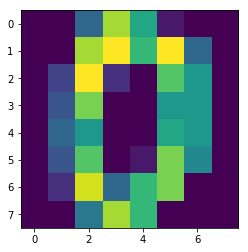

In [62]:
plt.imshow(X[0].reshape((8,8)))
print(Y[0])
plt.show()

1


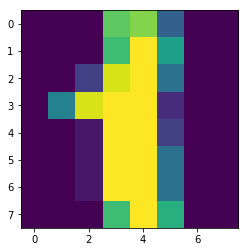

In [63]:
plt.imshow(X[1].reshape((8,8)))
print(Y[1])
plt.show()

9


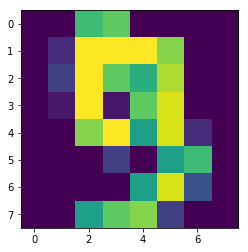

In [64]:
plt.imshow(X[9].reshape((8,8)))
print(Y[9])
plt.show()

4


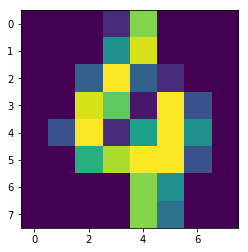

In [65]:
plt.imshow(X[100].reshape((8,8)))
print(Y[100])
plt.show()

1


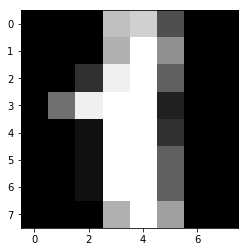

In [68]:
plt.imshow(X[1].reshape((8,8)),cmap='gray')
print(Y[1])
plt.show()

In [71]:
print(X[1]) # Discrete not continuous
# Grey between 0-15
# RGB between 0-255 each

[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


### B. Train Models

In [72]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [73]:
mnb=MultinomialNB()
gnb=GaussianNB()

In [74]:
# Train
mnb.fit(X,Y)
gnb.fit(X,Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [75]:
# Score (Accuracy)
print(mnb.score(X,Y))
print(gnb.score(X,Y))

0.9053978853644964
0.8580968280467446


In [77]:
cross_val_score(mnb,X,Y,scoring='Accuracy',cv=10)

array([0.85405405, 0.94535519, 0.88950276, 0.81666667, 0.86592179,
       0.8547486 , 0.97206704, 0.94382022, 0.80225989, 0.875     ])

In [78]:
cross_val_score(mnb,X,Y,scoring='accuracy',cv=10)

array([0.85405405, 0.94535519, 0.88950276, 0.81666667, 0.86592179,
       0.8547486 , 0.97206704, 0.94382022, 0.80225989, 0.875     ])

In [79]:
cross_val_score(mnb,X,Y,scoring='accuracy',cv=10).mean()

0.8819396216300838

In [80]:
cross_val_score(gnb,X,Y,scoring='accuracy',cv=10).mean()

0.8103537583567821

In [81]:
# This is because each feature is discrete valued! Hence mnb gives better results!